# Import module
Nhập các thư viện cần thiết như NumPy, scikit-learn để đánh giá, matplotlib để vẽ biểu đồ, và pickle để xuất. Ngoài ra, nhập DecisionTreeClassifier từ module Decision_Tree.py.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pickle
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))
from models.Decision_Tree import DecisionTreeClassifier, load_iris_data

# Load data
Sử dụng hàm load_iris_data từ module để tải bộ dữ liệu Iris từ file CSV. Chia dữ liệu thành tập huấn luyện và kiểm tra bằng train_test_split từ scikit-learn.

In [563]:
# Load data from CSV
data_path = os.path.join(os.getcwd(), '..', 'data', 'IRIS.csv')
X, y = load_iris_data(data_path)

# Shuffle data to ensure random split
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


# Train Decision Tree
Khởi tạo DecisionTreeClassifier với các tham số cụ thể (ví dụ: max_depth, criterion). Huấn luyện mô hình trên dữ liệu tập huấn luyện.

In [564]:
# Train models with both criteria
dt_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_entropy.fit(X_train, y_train)
print("Entropy model trained successfully!")

dt_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')
dt_gini.fit(X_train, y_train)
print("Gini model trained successfully!")

# Use entropy for main predictions
dt_classifier = dt_entropy

Entropy model trained successfully!
Gini model trained successfully!


# Test và đánh giá
Thực hiện dự đoán trên dữ liệu kiểm tra. Tính toán và hiển thị các chỉ số như độ chính xác, precision, recall, và F1-score bằng các hàm của scikit-learn.

In [565]:
# Test both models
print("=== ENTROPY ===")
y_pred_entropy = dt_entropy.predict(X_test)

print(f"Train size: {len(X_train)}")
print(f"Test size : {len(X_test)}")
print()

for i, (true, pred) in enumerate(zip(y_test, y_pred_entropy), 1):
    status = "✓" if true == pred else "✗"
    print(f"Sample {i}: True = {true} | Predicted = {pred} {status}")

print("\nMisclassified samples:")
for i, (true, pred, x) in enumerate(zip(y_test, y_pred_entropy, X_test), 1):
    if true != pred:
        print(f"Sample {i}: Features = {x}, True = {true}, Pred = {pred}")

acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"\nAccuracy: {acc_entropy:.2%}")

print("\n" + "="*50)
print("=== GINI ===")
y_pred_gini = dt_gini.predict(X_test)

for i, (true, pred) in enumerate(zip(y_test, y_pred_gini), 1):
    status = "✓" if true == pred else "✗"
    print(f"Sample {i}: True = {true} | Predicted = {pred} {status}")

print("\nMisclassified samples:")
for i, (true, pred, x) in enumerate(zip(y_test, y_pred_gini, X_test), 1):
    if true != pred:
        print(f"Sample {i}: Features = {x}, True = {true}, Pred = {pred}")

acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"\nAccuracy: {acc_gini:.2%}")

print("\n" + "="*50)
print("=== SO SÁNH ===")
print(f"Entropy Accuracy: {acc_entropy:.2%}")
print(f"Gini Accuracy: {acc_gini:.2%}")
if acc_entropy > acc_gini:
    print("Entropy tốt hơn.")
elif acc_gini > acc_entropy:
    print("Gini tốt hơn.")
else:
    print("Cả hai tương đương.")

# Use entropy for main predictions (for export)
y_pred = y_pred_entropy
accuracy = acc_entropy

=== ENTROPY ===
Train size: 120
Test size : 30

Sample 1: True = Iris-versicolor | Predicted = Iris-versicolor ✓
Sample 2: True = Iris-setosa | Predicted = Iris-setosa ✓
Sample 3: True = Iris-versicolor | Predicted = Iris-versicolor ✓
Sample 4: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 5: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 6: True = Iris-versicolor | Predicted = Iris-versicolor ✓
Sample 7: True = Iris-versicolor | Predicted = Iris-virginica ✗
Sample 8: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 9: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 10: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 11: True = Iris-setosa | Predicted = Iris-setosa ✓
Sample 12: True = Iris-versicolor | Predicted = Iris-versicolor ✓
Sample 13: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 14: True = Iris-setosa | Predicted = Iris-setosa ✓
Sample 15: True = Iris-virginica | Predicted = Iris-virginica ✓
Sample 16:

# Biểu đồ đánh giá hiệu suất mô hình
Vẽ biểu đồ cột so sánh độ chính xác của mô hình Entropy và Gini.

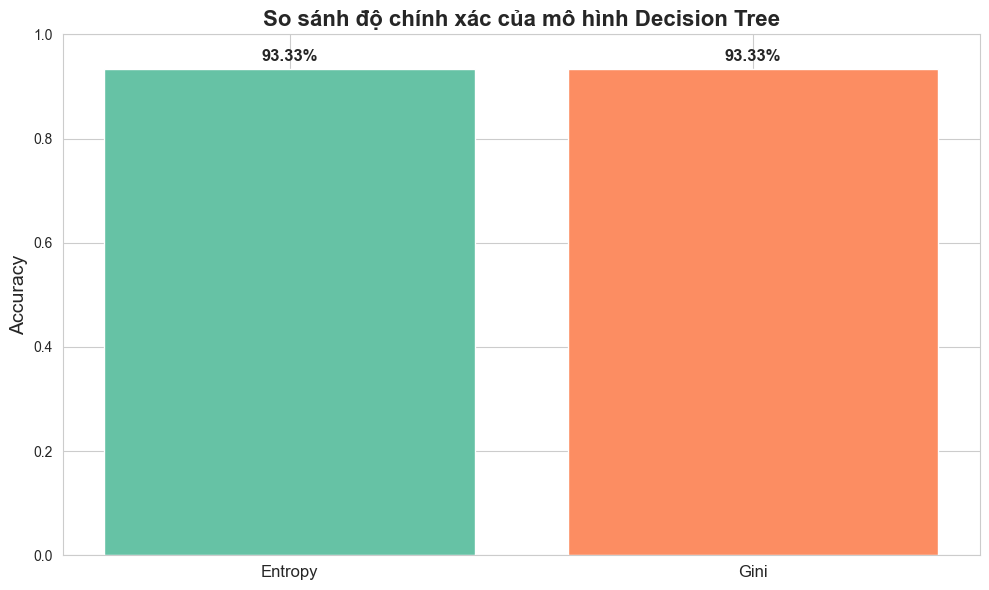

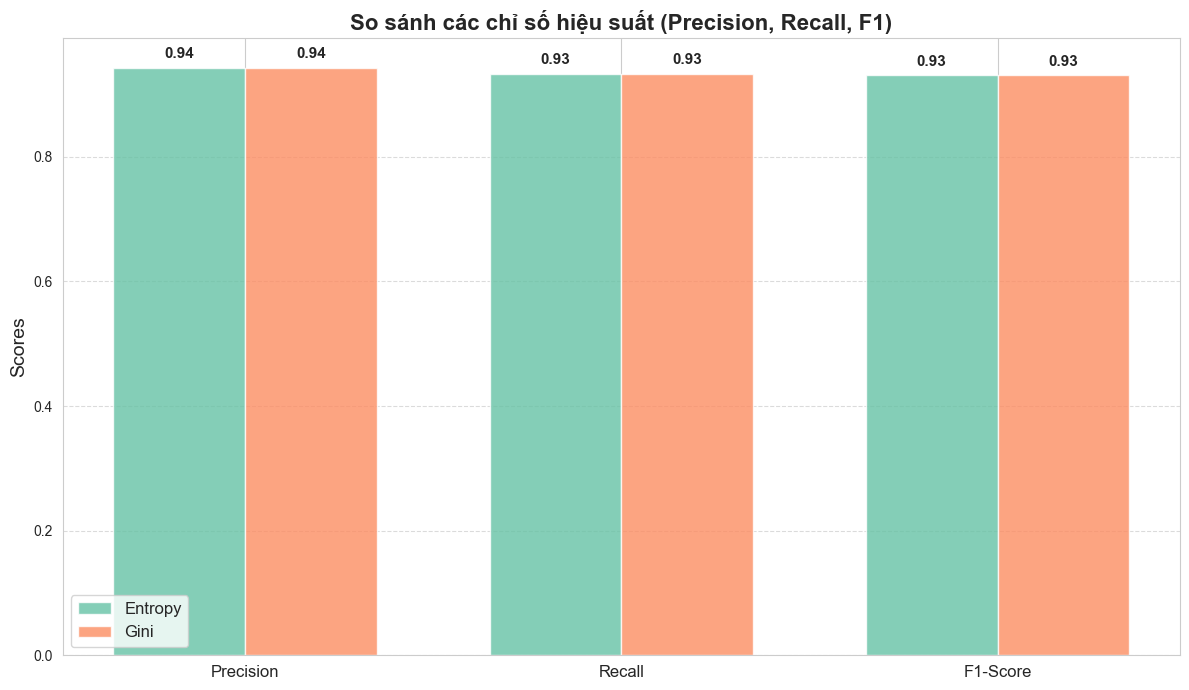

In [566]:
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Bar chart for accuracy comparison
criteria = ['Entropy', 'Gini']
accuracies = [acc_entropy, acc_gini]

plt.figure(figsize=(10, 6))  # Increased size for better visibility
palette = sns.color_palette("Set2", len(criteria))
bars = plt.bar(criteria, accuracies, color=palette)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)
plt.title('So sánh độ chính xác của mô hình Decision Tree', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Classification report comparison with grouped bar chart
from sklearn.metrics import precision_recall_fscore_support

precision_e, recall_e, f1_e, _ = precision_recall_fscore_support(y_test, y_pred_entropy, average='weighted')
precision_g, recall_g, f1_g, _ = precision_recall_fscore_support(y_test, y_pred_gini, average='weighted')

metrics = ['Precision', 'Recall', 'F1-Score']
entropy_metrics = [precision_e, recall_e, f1_e]
gini_metrics = [precision_g, recall_g, f1_g]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))  # Increased size for better visibility
palette = sns.color_palette("Set2", 2)
bars1 = ax.bar(x - width/2, entropy_metrics, width, label='Entropy', color=palette[0], alpha=0.8)
bars2 = ax.bar(x + width/2, gini_metrics, width, label='Gini', color=palette[1], alpha=0.8)

ax.set_ylabel('Scores', fontsize=14)
ax.set_title('So sánh các chỉ số hiệu suất (Precision, Recall, F1)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Xuất mô hình đã huấn luyện
Sử dụng pickle để serialize và lưu mô hình đã huấn luyện dưới dạng file .pkl trong thư mục src/models.

In [567]:
# Export the model
model_path = os.path.join(os.getcwd(), 'models', 'decision_tree.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(dt_classifier, f)

print(f"Model saved to {model_path}")

Model saved to c:\Project\MachineLearning\ML_Team4_IrisFlowers\src\models\decision_tree.pkl


# Nhập mô hình đã xuất
Sử dụng pickle để load mô hình từ file .pkl đã lưu và kiểm tra dự đoán trên dữ liệu mới.

In [568]:
# Import the model
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

# Test prediction with loaded model
loaded_predictions = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)
print(f"Loaded model accuracy: {loaded_accuracy:.2f}")

# Compare with original predictions
print(f"Predictions match: {np.array_equal(y_pred, loaded_predictions)}")

Model loaded successfully!
Loaded model accuracy: 0.93
Predictions match: True
